**I. Business Understanding**
The core objective of this excercise is to determine what features or characteristics of a vehicle determine or influence the price. Those characteristics can be anything from odometer reading to the vehicle color. However, not all characteristics are weighted equally to drive the vehicle  price. One or more of these vehicle features may hava a stronger influence in determining the final price. The end state is to identify for the core dealerships what factors are the most important as this will help these dealerships in how best to invest in vehicle management and purchases.

**II. Situation Assessment**
Resources for this excercise include a Kaggle Dataset that has been paired down from 3 million used cars to 426K. Due to limited compute resources, a sample of this dataset will be taken to best determine the characteristics that influence the price.  Simultaneously, the goal is to employ different regression models that best model and attempt to explain the data while minimizing the error value between predicted values and actual values. In this way, the model can best assess and explain the underlying data. The metrics to determine model viability will be Mean Squared Error(MSE), and R2. MSE indicates the average squared error between the actual and predicted values. A lower MSE means better predictability and accuracy. R2 indicates how best the dependent variable is explained by the model. A higher R2 ensures how best the model explains the data.


**III. Data Understanding and Exploration**

In [1]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

In [2]:
#Importing the original dataset
df = pd.read_csv('sample_data/vehicles.csv')

In [3]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
df.tail

<bound method NDFrame.tail of                id                  region  price    year manufacturer  \
0      7222695916                prescott   6000     NaN          NaN   
1      7218891961            fayetteville  11900     NaN          NaN   
2      7221797935            florida keys  21000     NaN          NaN   
3      7222270760  worcester / central MA   1500     NaN          NaN   
4      7210384030              greensboro   4900     NaN          NaN   
...           ...                     ...    ...     ...          ...   
16973  7311188912                    yuma  68995  2017.0         ford   
16974  7311188891                    yuma  43995  2017.0         ford   
16975  7311188860                    yuma  62995  2017.0    chevrolet   
16976  7311188837                    yuma  64995  2017.0    chevrolet   
16977  7311187012                    yuma  52995  2018.0       toyota   

                                                  model condition  \
0                                                   NaN       NaN   
1                                                   NaN       NaN   
2                                                   NaN       NaN   
3                                                   NaN       NaN   
4                                                   NaN       NaN   
...                                                 ...       ...   
16973            f-250 super duty lariat crew 6.7 liter       NaN   
16974                                    f-150 platinum       NaN   
16975  silverado 3500 high country drw 4wd 6.6l duramax       NaN   
16976       silverado 2500 ltz lifted duramax 6.6 liter       NaN   
16977                     tundra limited crewmax lifted       NaN   

         cylinders   fuel  odometer title_status transmission  \
0              NaN    NaN       NaN          NaN          NaN   
1              NaN    NaN       NaN          NaN          NaN   
2              NaN    NaN       NaN          NaN          NaN   
3              NaN    NaN       NaN          NaN          NaN   
4              NaN    NaN       NaN          NaN          NaN   
...            ...    ...       ...          ...          ...   
16973  8 cylinders  other   40417.0        clean    automatic   
16974  6 cylinders    gas   78252.0        clean    automatic   
16975  8 cylinders  other   74015.0        clean    automatic   
16976  8 cylinders  other   57920.0        clean    automatic   
16977  8 cylinders    gas     303.0          NaN          NaN   

                     VIN drive size    type paint_color state  
0                    NaN   NaN  NaN     NaN         NaN    az  
1                    NaN   NaN  NaN     NaN         NaN    ar  
2                    NaN   NaN  NaN     NaN         NaN    fl  
3                    NaN   NaN  NaN     NaN         NaN    ma  
4                    NaN   NaN  NaN     NaN         NaN    nc  
...                  ...   ...  ...     ...         ...   ...  
16973  1FT7W2BT6HED78645   4wd  NaN  pickup         red    az  
16974  1FTEW1EG7HFA34428   4wd  NaN  pickup       white    az  
16975  1GC4K1EY8HF169076   4wd  NaN  pickup       white    az  
16976  1GC1KWEY3HF192605   4wd  NaN  pickup         red    az  
16977                NaN   NaN  NaN     NaN         NaN   NaN  

[16978 rows x 18 columns]>

In [6]:
# Both the head and tail of the dataframe indicate that there are several values that indicate null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16978 entries, 0 to 16977
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            16978 non-null  int64  
 1   region        16978 non-null  object 
 2   price         16978 non-null  int64  
 3   year          16826 non-null  float64
 4   manufacturer  16215 non-null  object 
 5   model         16760 non-null  object 
 6   condition     9821 non-null   object 
 7   cylinders     11086 non-null  object 
 8   fuel          16813 non-null  object 
 9   odometer      16841 non-null  float64
 10  title_status  16653 non-null  object 
 11  transmission  16890 non-null  object 
 12  VIN           11174 non-null  object 
 13  drive         12109 non-null  object 
 14  size          4539 non-null   object 
 15  type          13828 non-null  object 
 16  paint_color   12960 non-null  object 
 17  state         16977 non-null  object 
dtypes: float64(2), int64(2), o

In [7]:
#16978 entries in the dataset, 18 features/variables, several are category variables, a few are numeric in nature. As indicated, several data points have null values

In [8]:
df.describe()

,id,price,year,odometer
count,1.697800e+04,1.697800e+04,16826.000000,1.684100e+04
mean,7.311664e+09,8.450064e+04,2011.557233,9.967503e+04
std,5.796063e+06,7.618422e+06,10.126831,3.750892e+05
min,7.208550e+09,0.000000e+00,1901.000000,0.000000e+00
25%,7.308367e+09,8.900000e+03,2009.000000,2.950600e+04
50%,7.312984e+09,1.799500e+04,2014.000000,7.102100e+04
75%,7.315743e+09,2.959000e+04,2017.000000,1.228000e+05
max,7.316896e+09,9.876543e+08,2022.000000,1.000000e+07


In [9]:
#Numeric variables include an average of 2011 as the average year, a 1900 year old vehicle and newest is 2022.

In [10]:
df.shape

(16978, 18)

In [11]:
df = df[df['price'] <= 200000]

print("Filtered DataFrame:")
print(df)

# Price has a significant max value

Filtered DataFrame:
               id                  region  price    year manufacturer  \
0      7222695916                prescott   6000     NaN          NaN   
1      7218891961            fayetteville  11900     NaN          NaN   
2      7221797935            florida keys  21000     NaN          NaN   
3      7222270760  worcester / central MA   1500     NaN          NaN   
4      7210384030              greensboro   4900     NaN          NaN   
...           ...                     ...    ...     ...          ...   
16973  7311188912                    yuma  68995  2017.0         ford   
16974  7311188891                    yuma  43995  2017.0         ford   
16975  7311188860                    yuma  62995  2017.0    chevrolet   
16976  7311188837                    yuma  64995  2017.0    chevrolet   
16977  7311187012                    yuma  52995  2018.0       toyota   

                                                  model condition  \
0                                 

<ipython-input-13-2566d52390a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)


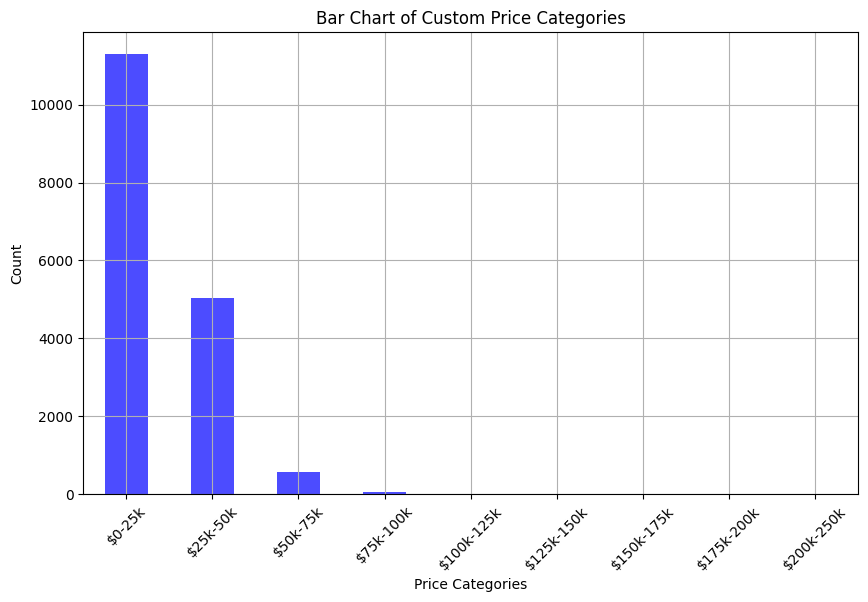

In [13]:
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 250000]  # Custom bins
labels = ['$0-25k', '$25k-50k', '$50k-75k', '$75k-100k', '$100k-125k', '$125k-150k', '$150k-175k', '$175k-200k', '$200k-250k']

df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

category_counts = df['price_category'].value_counts()

# Plotting the grouped data
plt.figure(figsize=(10, 6))  # Adjust size as needed
category_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Bar Chart of Custom Price Categories')
plt.xlabel('Price Categories')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
# Most cars are priced at the low end within the $0-$25K category

In [14]:
df.describe()

,id,price,year,odometer
count,1.697100e+04,16971.000000,16819.000000,1.683400e+04
mean,7.311663e+09,20378.617112,2011.564600,9.958856e+04
std,5.796761e+06,15103.201942,10.101514,3.750363e+05
min,7.208550e+09,0.000000,1901.000000,0.000000e+00
25%,7.308366e+09,8900.000000,2009.000000,2.951400e+04
50%,7.312984e+09,17995.000000,2014.000000,7.102100e+04
75%,7.315743e+09,29590.000000,2017.000000,1.227962e+05
max,7.316896e+09,145000.000000,2022.000000,1.000000e+07


In [16]:
#Max price is $145,000 and the least is $0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16971 entries, 0 to 16977
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              16971 non-null  int64   
 1   region          16971 non-null  object  
 2   price           16971 non-null  int64   
 3   year            16819 non-null  float64 
 4   manufacturer    16209 non-null  object  
 5   model           16754 non-null  object  
 6   condition       9821 non-null   object  
 7   cylinders       11082 non-null  object  
 8   fuel            16806 non-null  object  
 9   odometer        16834 non-null  float64 
 10  title_status    16646 non-null  object  
 11  transmission    16883 non-null  object  
 12  VIN             11170 non-null  object  
 13  drive           12105 non-null  object  
 14  size            4537 non-null   object  
 15  type            13824 non-null  object  
 16  paint_color     12956 non-null  object  
 17  state           1

In [18]:
#16971 datapoints across 18 features

**Univariate Analysis**

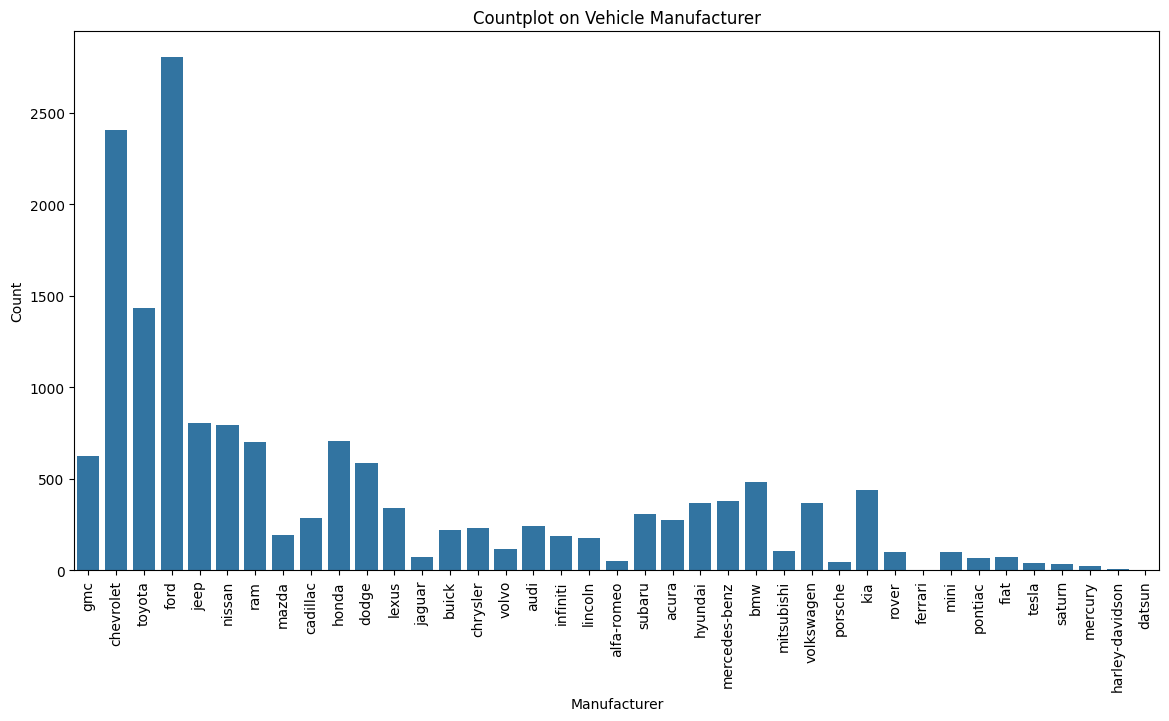

In [19]:
# Countplot of different companies
plt.figure(figsize=(14,7))
sns.countplot(x='manufacturer', data=df)
plt.xticks(rotation=90)
plt.title('Countplot on Vehicle Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show()

In [20]:
# Ford is the most manufactured vehicle , Aston-Martin is the least manufactured vehicle

Minimum year: 1901.0
Maximum year: 2022.0


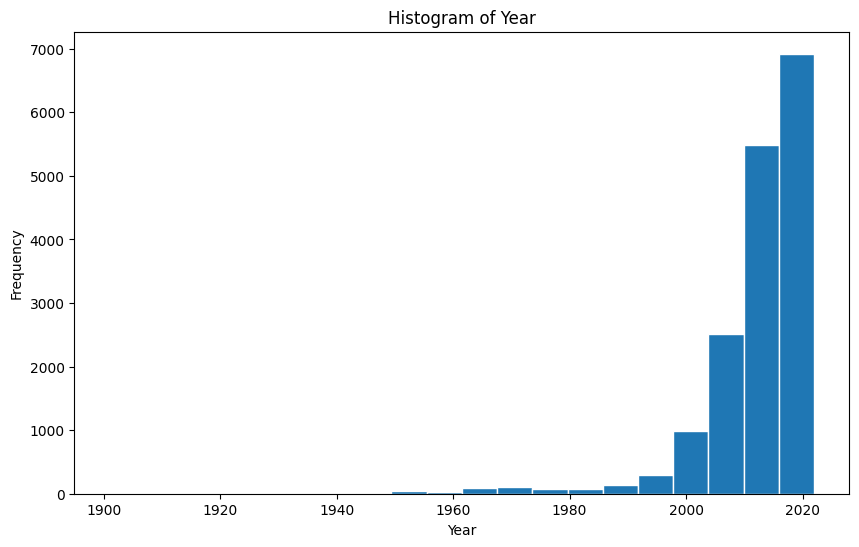

In [21]:
import matplotlib.pyplot as plt
min_year_w = df['year'].min()
max_year_w = df['year'].max()
print(f"Minimum year: {min_year_w}")
print(f"Maximum year: {max_year_w}")
plt.figure(figsize=(10, 6))
plt.hist(df['year'], bins=20, edgecolor='white')
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [22]:
# The dataset contains car information from 1900 to 2022. Most cars were counted during 2022, and the least in 1900. Data distribution indicates that the data is a left skewed distribution. This also indicates the majority of the vehicles were produced in recent years probably due to increased popularity of vehicle consumption.

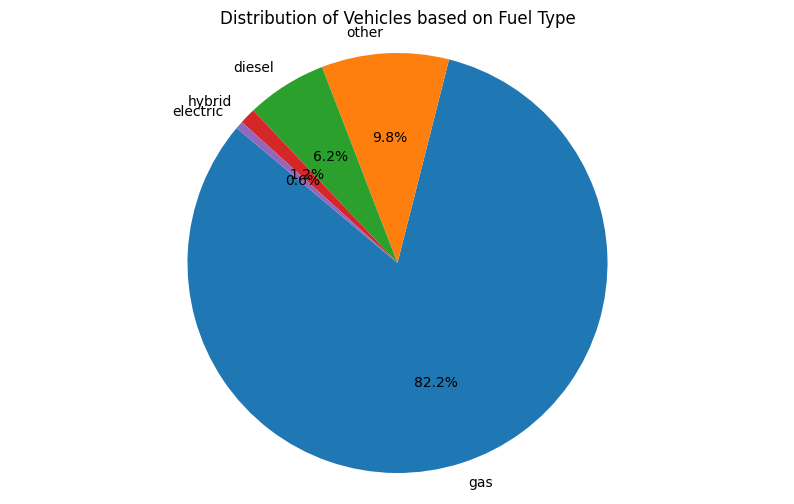

In [23]:
fuel_type_w = df['fuel'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(fuel_type_w, labels=fuel_type_w.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Vehicles based on Fuel Type')
plt.axis('equal')
plt.show()

In [24]:
# Based on the data in the datset 82% of vehicles run on gas. Next fuel type includes 'Other' followed by 'Diesel'. The least fuel type is electric. Had this dataset been more current, it's likely that electric fuel type will more popular. And depending on the region, or state like California, electric vehicles tend to be more popular.

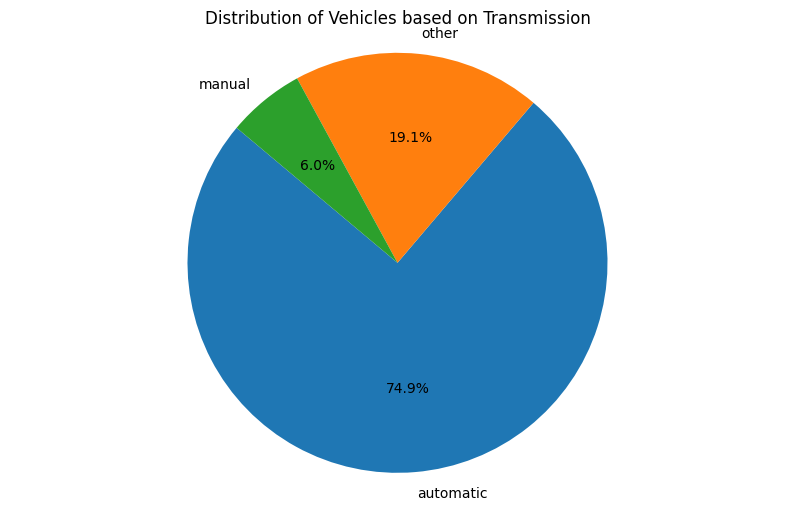

In [25]:
transmission_type_w = df['transmission'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(transmission_type_w, labels=transmission_type_w.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Vehicles based on Transmission')
plt.axis('equal')
plt.show()

In [26]:
#Based on the dataset close to 75% of the dataset suggests that vehicle type leverages automatic transmission. 6.5% of the vehicles leverage manual transmission. This of course would vary based on more granular regional data. For example, in California, it's possible that more vehicles would leverage manual transmission.

<function matplotlib.pyplot.show(close=None, block=None)>

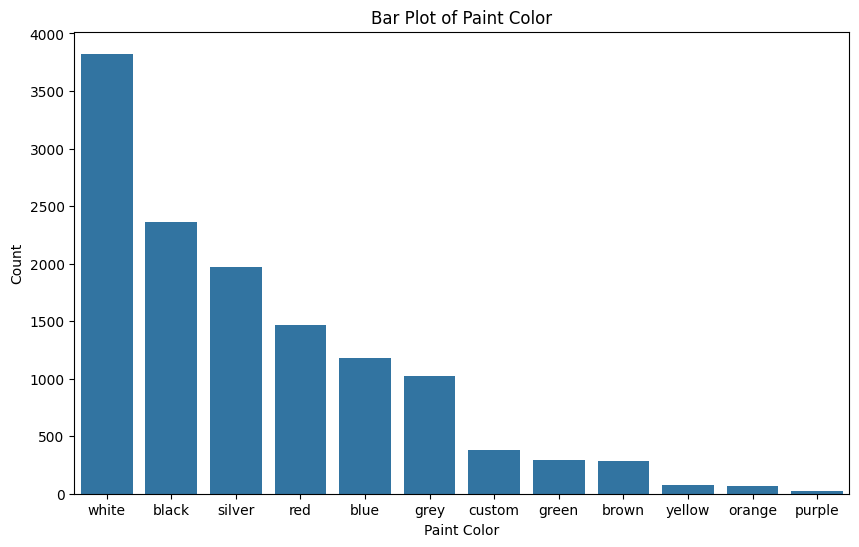

In [27]:
paint_color_w = df['paint_color'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=paint_color_w.index, y=paint_color_w.values)
plt.title('Bar Plot of Paint Color')
plt.xlabel('Paint Color')
plt.ylabel('Count')
plt.show

In [28]:
# The most painted car is white; The least painted car is purple.

<function matplotlib.pyplot.show(close=None, block=None)>

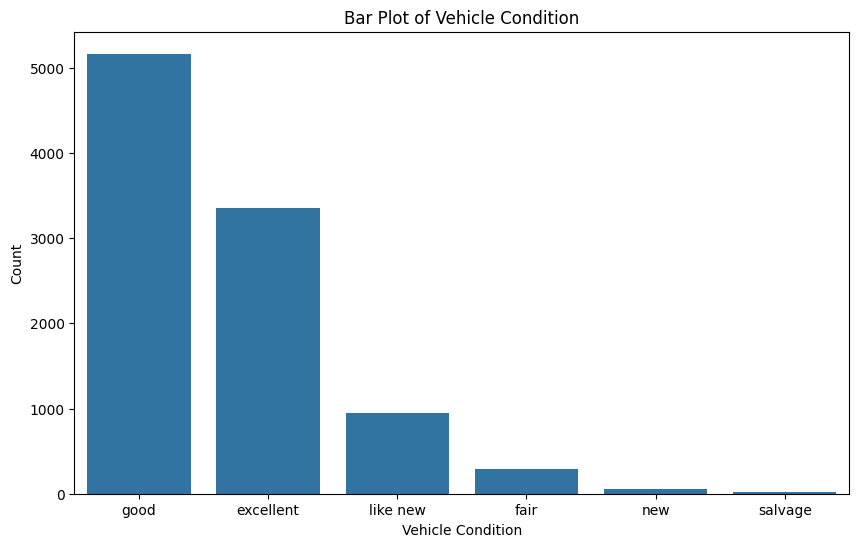

In [29]:
condition_w = df['condition'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=condition_w.index, y=condition_w.values)
plt.title('Bar Plot of Vehicle Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Count')
plt.show

In [31]:
#Most vehicles are in good condition with the least requiring salvage. This indicates that vehicles in the dataset, have been well maintained. This is of course also dependant on the age of the vehicle and other features e.g maintenance cost, disposable income available for car maintenance.

<function matplotlib.pyplot.show(close=None, block=None)>

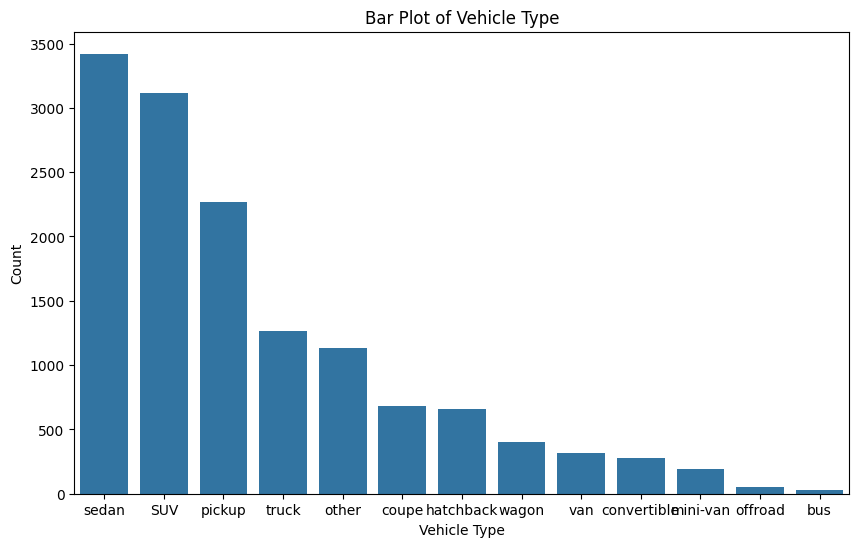

In [32]:
type_w = df['type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=type_w.index, y=type_w.values)
plt.title('Bar Plot of Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show

In [33]:
# Clearly the most popular vehicle is the sedan

**Bivariate Analysis**

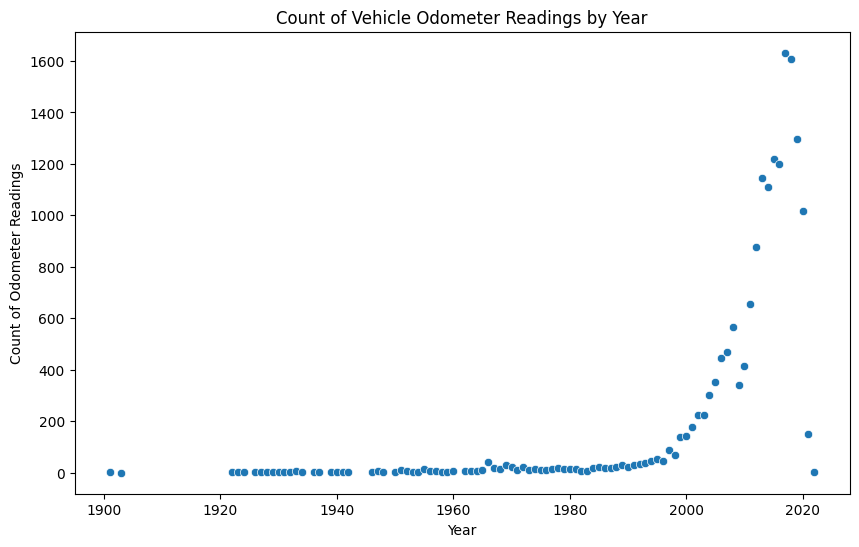

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Group by 'year' and count the number of odometer readings for each year
yearly_odometer_counts = df.groupby('year')['odometer'].count().reset_index()

plt.figure(figsize=(10, 6))

sns.scatterplot(x=yearly_odometer_counts['year'], y=yearly_odometer_counts['odometer'])


plt.title('Count of Vehicle Odometer Readings by Year')
plt.xlabel('Year')
plt.ylabel('Count of Odometer Readings')


plt.show()

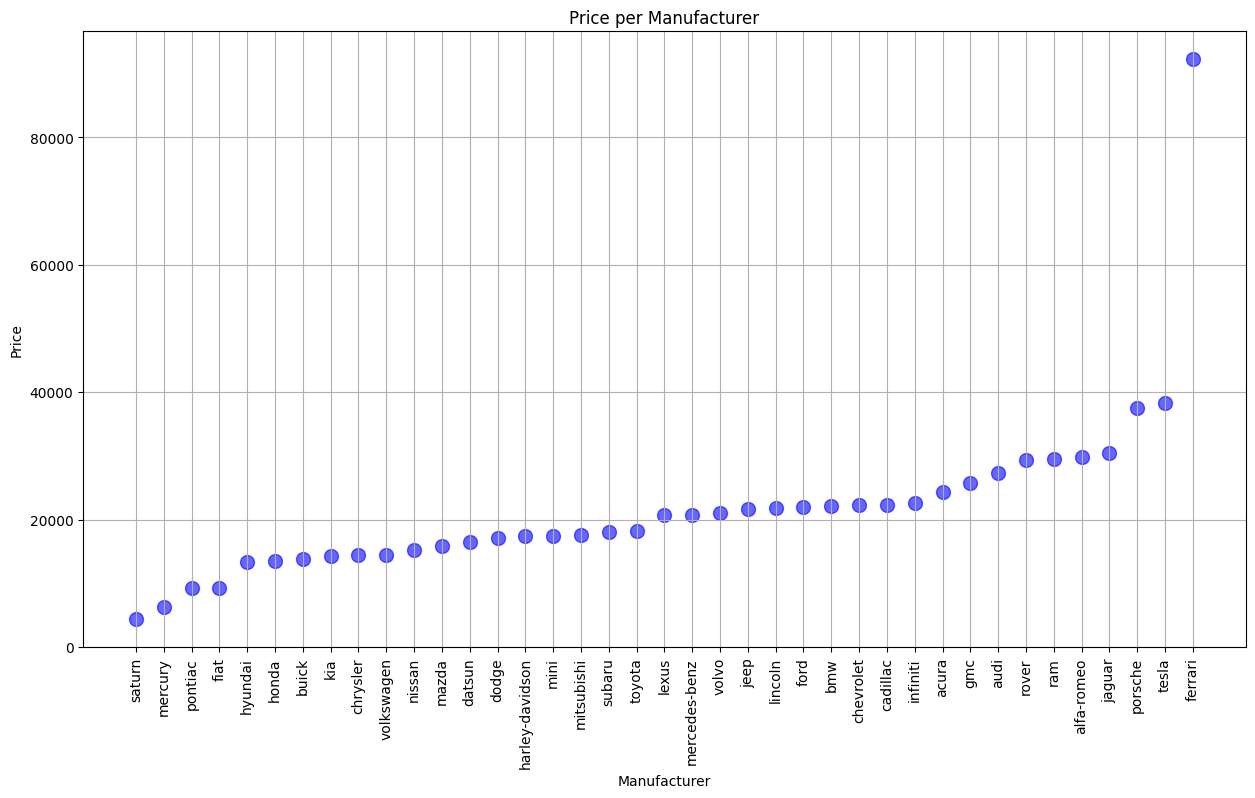

In [35]:
price_per_manufacturer = df.groupby('manufacturer')['price'].mean().reset_index()
price_per_manufacturer = price_per_manufacturer.sort_values(by='price')
plt.figure(figsize=(15, 8))
plt.scatter(price_per_manufacturer['manufacturer'], price_per_manufacturer['price'], s=100, c='blue', alpha=0.6)
plt.title('Price per Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

<ipython-input-36-0ee0b0390804>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='manufacturer', y='price', data=price_per_manufacturer, palette='viridis')


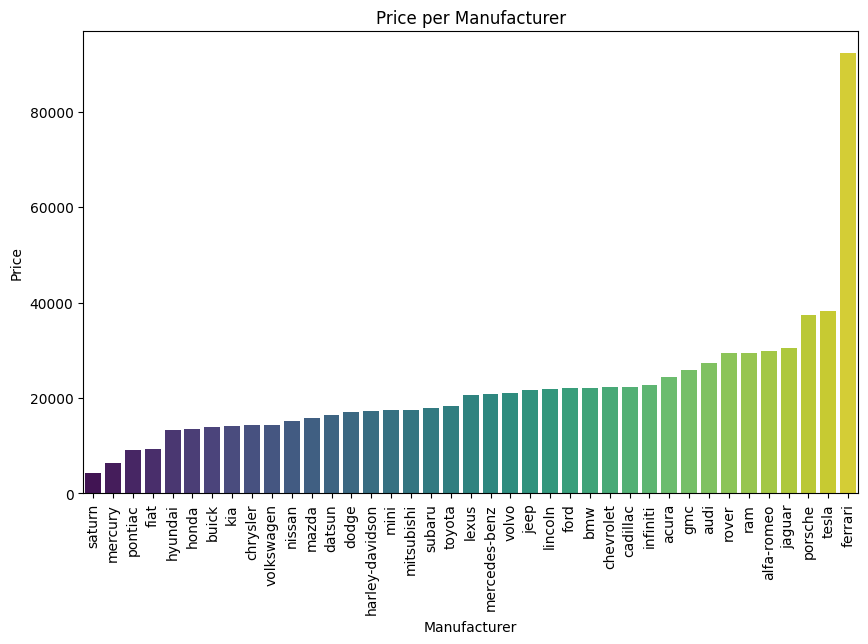

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='manufacturer', y='price', data=price_per_manufacturer, palette='viridis')
plt.title('Price per Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [37]:
# The most expensive car is a ferrari which is not a suprise based on domain knowledge. The cheapest car is a saturn, a displaced division of General Motors and no longer produces vehicles under that brand.

<ipython-input-38-2ac75c12905d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fuel', y='price', data=df, palette='viridis')


Text(0, 0.5, 'Price')

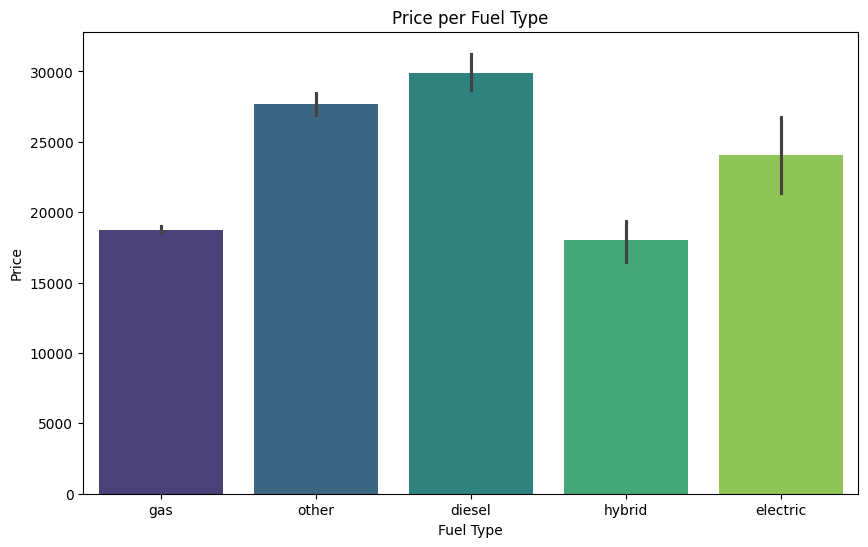

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel', y='price', data=df, palette='viridis')
plt.title('Price per Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')

In [39]:
# Diesel Vehicles tend to be the most expensive in price. Not suprising since diesel vehicles may not have the mass scale to reduce price per unit and hence may be more expensive.

<ipython-input-40-e81503a4c81c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='price', data=df, palette='viridis')


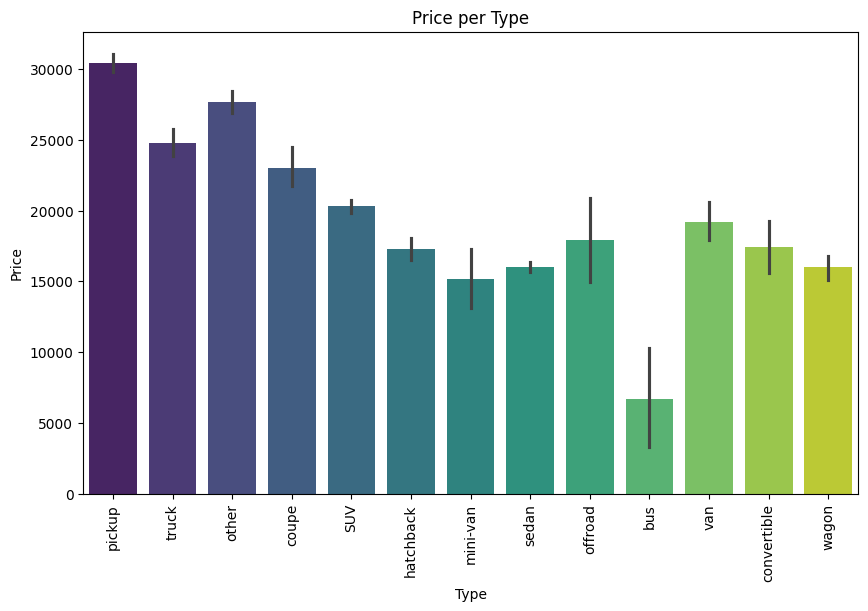

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='price', data=df, palette='viridis')
plt.title('Price per Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [41]:
#Pickup trucks tend be the most expensive followed by convertible

<ipython-input-42-225954c5b845>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='size', y='price', data=df, palette='viridis')


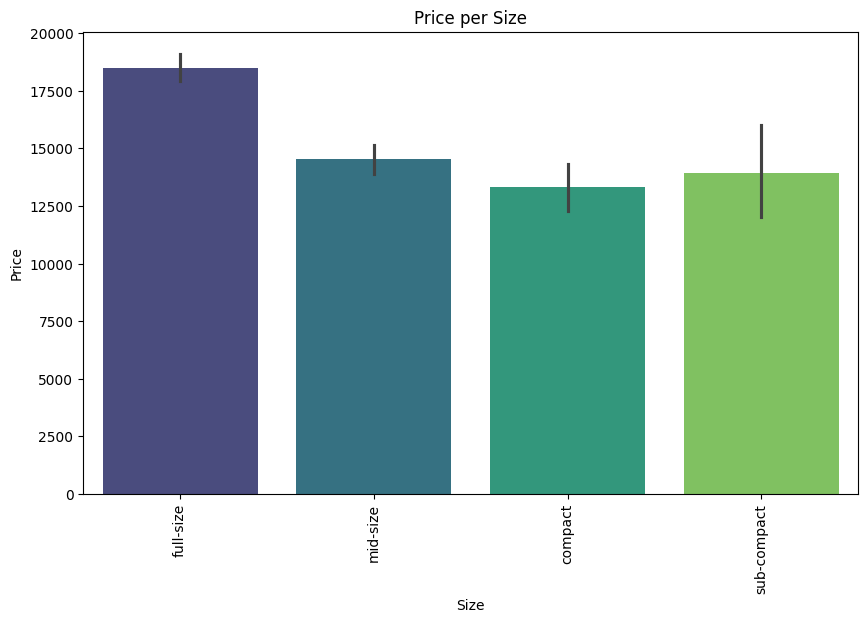

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='size', y='price', data=df, palette='viridis')
plt.title('Price per Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [43]:
#Full size vehicles tend to be the most expensive as per price in comparison to mid-size, compact, and sub-compact.

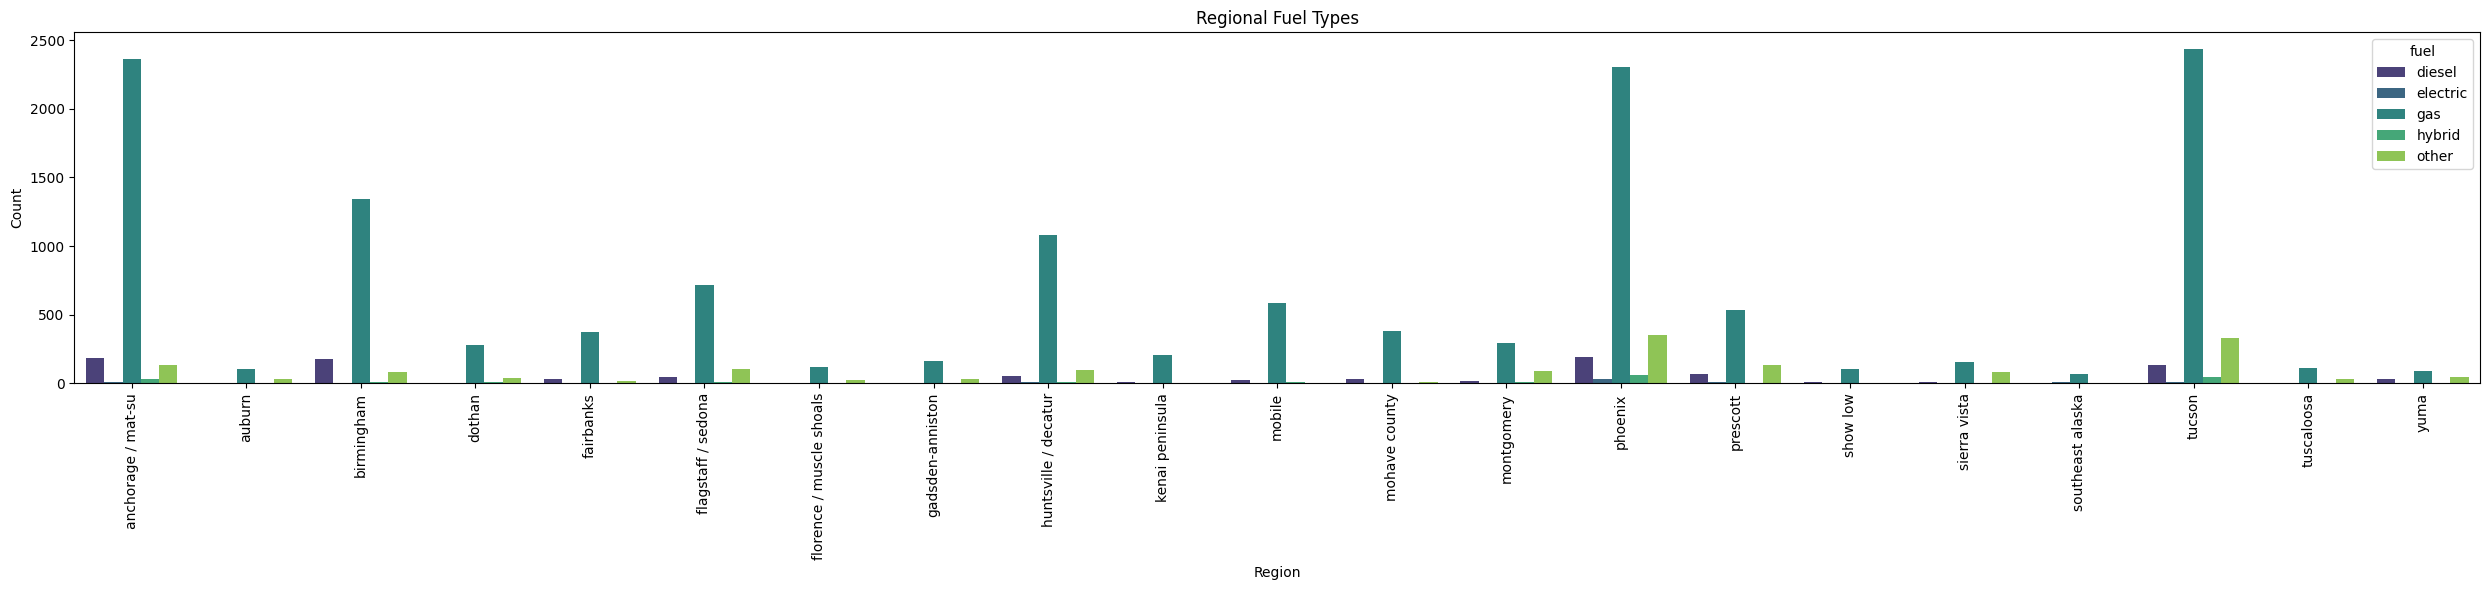

In [44]:
plt.figure(figsize=(25, 6))

# Group by 'region' and 'fuel' and count occurrences
grouped_df = df.groupby(['region', 'fuel']).size().reset_index(name='count')

sns.barplot(x='region', y='count', hue='fuel', data=grouped_df, palette='viridis', linewidth=4)


plt.title('Regional Fuel Types')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

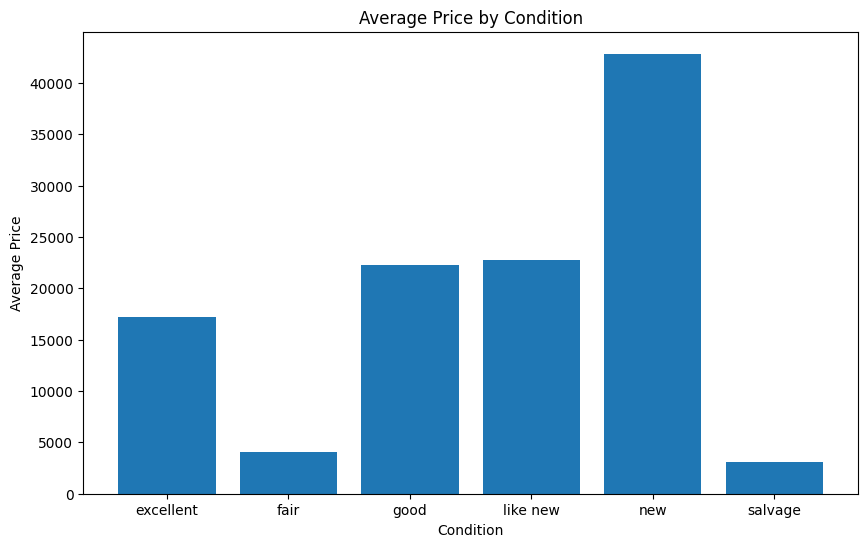

In [45]:
condition_vs_price = df.groupby('condition')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(condition_vs_price['condition'], condition_vs_price['price'])
plt.title('Average Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.show

<ipython-input-46-588b49ae567e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='manufacturer', data=df, palette='viridis', linewidth=4)


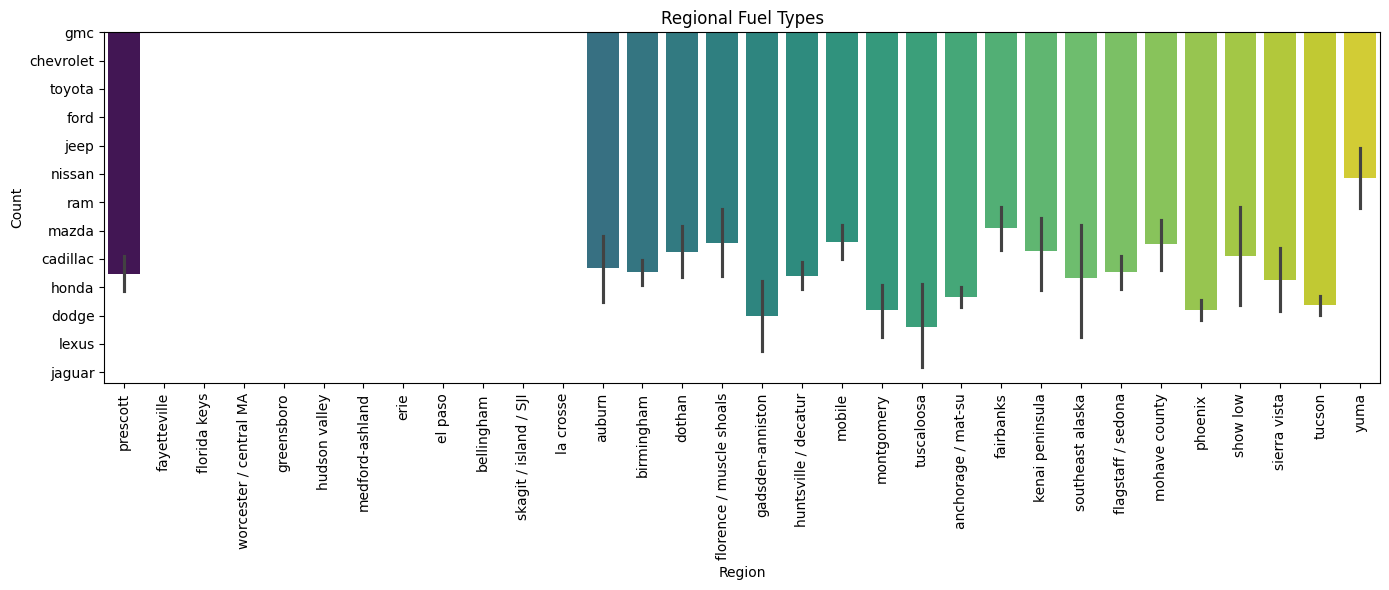

In [46]:
plt.figure(figsize=(14, 6))

# Group by 'region' and 'fuel' and count occurrences
grouped_df_rm = df.groupby(['region', 'manufacturer']).size().reset_index(name='count')

sns.barplot(x='region', y='manufacturer', data=df, palette='viridis', linewidth=4)

# Add titles and labels
plt.title('Regional Fuel Types')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

**Data Preprocessing and Transformation**

In [47]:
df.isnull().sum()
#Checking for null values

id                    0
region                0
price                 0
year                152
manufacturer        762
model               217
condition          7150
cylinders          5889
fuel                165
odometer            137
title_status        325
transmission         88
VIN                5801
drive              4866
size              12434
type               3147
paint_color        4015
state                 1
price_category        0
dtype: int64

In [48]:
#checking the percentage of missing values in each variable
df.isnull().sum()/len(df)*100

id                 0.000000
region             0.000000
price              0.000000
year               0.895646
manufacturer       4.490012
model              1.278652
condition         42.130694
cylinders         34.700371
fuel               0.972247
odometer           0.807259
title_status       1.915032
transmission       0.518532
VIN               34.181840
drive             28.672441
size              73.266160
type              18.543398
paint_color       23.658005
state              0.005892
price_category     0.000000
dtype: float64

The highest percentage of null values appear in the size variable/feature and the condition variable.

In [49]:
df.drop(['id', 'VIN'], axis=1)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price_category
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,$0-25k
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,$0-25k
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,$0-25k
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,$0-25k
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,$0-25k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16973,yuma,68995,2017.0,ford,f-250 super duty lariat crew 6.7 liter,NaN,8 cylinders,other,40417.0,clean,automatic,4wd,NaN,pickup,red,az,$50k-75k
16974,yuma,43995,2017.0,ford,f-150 platinum,NaN,6 cylinders,gas,78252.0,clean,automatic,4wd,NaN,pickup,white,az,$25k-50k
16975,yuma,62995,2017.0,chevrolet,silverado 3500 high country drw 4wd 6.6l duramax,NaN,8 cylinders,other,74015.0,clean,automatic,4wd,NaN,pickup,white,az,$50k-75k
16976,yuma,64995,2017.0,chevrolet,silverado 2500 ltz lifted duramax 6.6 liter,NaN,8 cylinders,other,57920.0,clean,automatic,4wd,NaN,pickup,red,az,$50k-75k


In [50]:
#Dropping ID, VIN as they may not be relevant to the features against the price

In [51]:
 df_working = df.copy()

In [52]:
#grouping category variables
categorical_columns = df_working.select_dtypes(include=['object', 'category']).columns

In [53]:
for c in categorical_columns:
    df_working[c] = df_working[c].astype('category')
    mode_value = df_working[c].mode()[0]
    df_working[c].fillna(mode_value, inplace=True)


In [54]:
#Filling NA values with the most repeated values

In [55]:
numerical_columns = df_working.select_dtypes(include=['int64', 'float64']).columns

In [56]:
for column in numerical_columns:
    mean_value = df_working[column].mean()  # Calculate the mean of the column
    df_working[column].fillna(mean_value, inplace=True)

In [57]:
df_working.isnull().sum()

id                0
region            0
price             0
year              0
manufacturer      0
model             0
condition         0
cylinders         0
fuel              0
odometer          0
title_status      0
transmission      0
VIN               0
drive             0
size              0
type              0
paint_color       0
state             0
price_category    0
dtype: int64

In [58]:
#Checking for any null values

In [ ]:
#Creating a sample and a smaller dataset to work with

In [59]:
sample_fraction = 0.30  # Sample size as a percentage of the original dataset
df_sample =  df_working.sample(frac=sample_fraction, random_state=42)
print(f"Original dataset size: {len(df_working)}")
print(f"Sample dataset size: {len(df_sample)}")
print(df_sample.head())

Original dataset size: 16971
Sample dataset size: 5091
               id              region  price    year manufacturer  \
6111   7311668485  anchorage / mat-su  37194  2018.0         ford   
4717   7305743767          montgomery  82998  2020.0          gmc   
14217  7316298251              tucson  42990  2014.0       toyota   
8199   7314351016     kenai peninsula  30988  2019.0        dodge   
10256  7316748151             phoenix   6899  2003.0          bmw   

                      model  condition    cylinders   fuel  odometer  \
6111                  f-150       good  8 cylinders    gas   53011.0   
4717   sierra 3500hd denali  excellent  6 cylinders    gas    8420.0   
14217            fj cruiser       good  6 cylinders  other   63117.0   
8199                charger       good  6 cylinders    gas   30209.0   
10256                 330ci   like new  4 cylinders    gas  111853.0   

      title_status transmission                VIN drive       size   type  \
6111         clean 

In [60]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5091 entries, 6111 to 13842
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              5091 non-null   int64   
 1   region          5091 non-null   category
 2   price           5091 non-null   int64   
 3   year            5091 non-null   float64 
 4   manufacturer    5091 non-null   category
 5   model           5091 non-null   category
 6   condition       5091 non-null   category
 7   cylinders       5091 non-null   category
 8   fuel            5091 non-null   category
 9   odometer        5091 non-null   float64 
 10  title_status    5091 non-null   category
 11  transmission    5091 non-null   category
 12  VIN             5091 non-null   category
 13  drive           5091 non-null   category
 14  size            5091 non-null   category
 15  type            5091 non-null   category
 16  paint_color     5091 non-null   category
 17  state          

In [61]:
df_working_le = df_sample.copy()

In [62]:
#Using Labelencoder as part of the data preprocessing stage to transform categorical data into a numerical format so that it can injected as part of the machine learning. Each of the catgeorical columns like Region, Manufacturer, model, condition, cylinders, fuel, title_status , transmission etc is encoded into numeric labels. This will ensure compatibility with ML algorithms which are best suited with numeric input.

In [63]:
df_working_le = df_working_le.drop(['id', 'VIN'], axis=1)

In [64]:
df_working_le.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5091 entries, 6111 to 13842
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   region          5091 non-null   category
 1   price           5091 non-null   int64   
 2   year            5091 non-null   float64 
 3   manufacturer    5091 non-null   category
 4   model           5091 non-null   category
 5   condition       5091 non-null   category
 6   cylinders       5091 non-null   category
 7   fuel            5091 non-null   category
 8   odometer        5091 non-null   float64 
 9   title_status    5091 non-null   category
 10  transmission    5091 non-null   category
 11  drive           5091 non-null   category
 12  size            5091 non-null   category
 13  type            5091 non-null   category
 14  paint_color     5091 non-null   category
 15  state           5091 non-null   category
 16  price_category  5091 non-null   category
dtypes: category(14)

In [65]:
from sklearn.preprocessing import LabelEncoder
Region_le = LabelEncoder()
df_working_le['region'] = Region_le.fit_transform(df_working_le['region'])
Manufacturer_le = LabelEncoder()
df_working_le['manufacturer'] = Manufacturer_le.fit_transform(df_working_le['manufacturer'])
Model_le = LabelEncoder()
df_working_le['model'] = Model_le.fit_transform(df_working_le['model'])
Condition_le = LabelEncoder()
df_working_le['condition'] = Condition_le.fit_transform(df_working_le['condition'])
Cylinders_le = LabelEncoder()
df_working_le['cylinders'] = Cylinders_le.fit_transform(df_working_le['cylinders'])
Fuel_le = LabelEncoder()
df_working_le['fuel'] = Fuel_le.fit_transform(df_working_le['fuel'])
Title_Status_le = LabelEncoder()
df_working_le['title_status'] = Title_Status_le.fit_transform(df_working_le['title_status'])
Transmission_le = LabelEncoder()
df_working_le['transmission'] = Transmission_le.fit_transform(df_working_le['transmission'])
Drive_le = LabelEncoder()
df_working_le['drive'] = Drive_le.fit_transform(df_working_le['drive'])
Size_le = LabelEncoder()
df_working_le['size'] = Size_le.fit_transform(df_working_le['size'])
Type_le = LabelEncoder()
df_working_le['type'] = Type_le.fit_transform(df_working_le['type'])
Paint_Color_le = LabelEncoder()
df_working_le['paint_color'] = Paint_Color_le.fit_transform(df_working_le['paint_color'])
State_le = LabelEncoder()
df_working_le['state'] = State_le.fit_transform(df_working_le['state'])
Price_category_le = LabelEncoder()
df_working_le['price_category'] = Price_category_le.fit_transform(df_working_le['price_category'])

In [66]:
df_working_le.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5091 entries, 6111 to 13842
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          5091 non-null   int64  
 1   price           5091 non-null   int64  
 2   year            5091 non-null   float64
 3   manufacturer    5091 non-null   int64  
 4   model           5091 non-null   int64  
 5   condition       5091 non-null   int64  
 6   cylinders       5091 non-null   int64  
 7   fuel            5091 non-null   int64  
 8   odometer        5091 non-null   float64
 9   title_status    5091 non-null   int64  
 10  transmission    5091 non-null   int64  
 11  drive           5091 non-null   int64  
 12  size            5091 non-null   int64  
 13  type            5091 non-null   int64  
 14  paint_color     5091 non-null   int64  
 15  state           5091 non-null   int64  
 16  price_category  5091 non-null   int64  
dtypes: float64(2), int64(15)
memory us

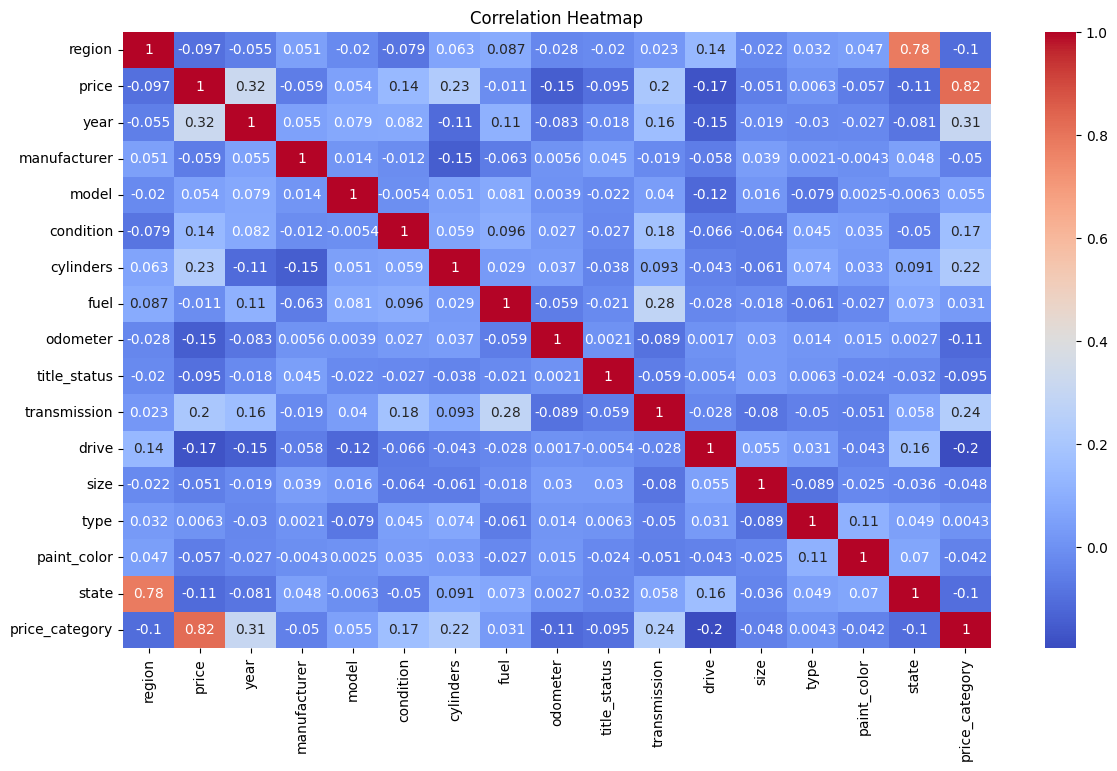

In [67]:
corr = df_working_le.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The most correlated values to price include are the year, and transmission, and cylinders.  The most negative or inverse correlation to price are the state, and drive features. Interestingly the highest correlation is .82 between the price_category and price.

In [68]:
df_working_le.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5091 entries, 6111 to 13842
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          5091 non-null   int64  
 1   price           5091 non-null   int64  
 2   year            5091 non-null   float64
 3   manufacturer    5091 non-null   int64  
 4   model           5091 non-null   int64  
 5   condition       5091 non-null   int64  
 6   cylinders       5091 non-null   int64  
 7   fuel            5091 non-null   int64  
 8   odometer        5091 non-null   float64
 9   title_status    5091 non-null   int64  
 10  transmission    5091 non-null   int64  
 11  drive           5091 non-null   int64  
 12  size            5091 non-null   int64  
 13  type            5091 non-null   int64  
 14  paint_color     5091 non-null   int64  
 15  state           5091 non-null   int64  
 16  price_category  5091 non-null   int64  
dtypes: float64(2), int64(15)
memory us

In [69]:
#Splitting the data into input and output data
X= df_working_le.drop('price', axis=1)
y= df_working_le['price']

In [70]:
#Model run 1

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Define X and y as the independant and dependant variables
X = df_working_le.drop('price', axis=1)
y = df_working_le['price']

# Split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with polynomial features and Ridge regression
degree = 2
param_grid = {'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}

model_pgs = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), Ridge())

# Perform grid search
grid_search = GridSearchCV(model_pgs, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
print("Best alpha:", grid_search.best_params_['ridge__alpha'])
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best alpha: 1.0
R2 Score: 0.7879546886922705
Mean Squared Error: 48805749.65502113


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.01043e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [71]:
# Attempting to Standardize the data with StandardScaler and Ridge - Model Run 2

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge

# Define X and y as the independant and dependant variables
X = df_working_le.drop('price', axis=1)
y = df_working_le['price']


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'regressor__alpha': [10.0],  # Example: Regularization strength
    'regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score from GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2 Score on Test Set:", r2)
print("Mean Squared Error on Test Set:", mse)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Parameters: {'regressor__alpha': 10.0, 'regressor__solver': 'sag'}
Best Negative Mean Squared Error: -71013997.0541757
R2 Score on Test Set: 0.6955929446520976
Mean Squared Error on Test Set: 70064338.81940931


In [72]:
# Model Run 3 with StandardScaler and RandomForest

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Define X and y as the independant and dependant variables
X = df_working_le.drop('price', axis=1)
y = df_working_le['price']

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define a pipeline to scale data and train the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

#Standardizing the data for uniform comparison and improving model performance


# Train the RandomForest model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


MSE: 46560022.2610
RMSE: 6823.4905
R²: 0.7977


R² Score: 0.9029
Mean Squared Error (MSE): 22358984.1553
Root Mean Squared Error (RMSE): 4728.5288

Feature Importance:
region            0.013497
year              0.041504
manufacturer      0.014132
model             0.030752
condition         0.005752
cylinders         0.012368
fuel              0.007928
odometer          0.046792
title_status      0.000992
transmission      0.006050
drive             0.008859
size              0.001608
type              0.011136
paint_color       0.008631
state             0.006224
price_category    0.783776
dtype: float64


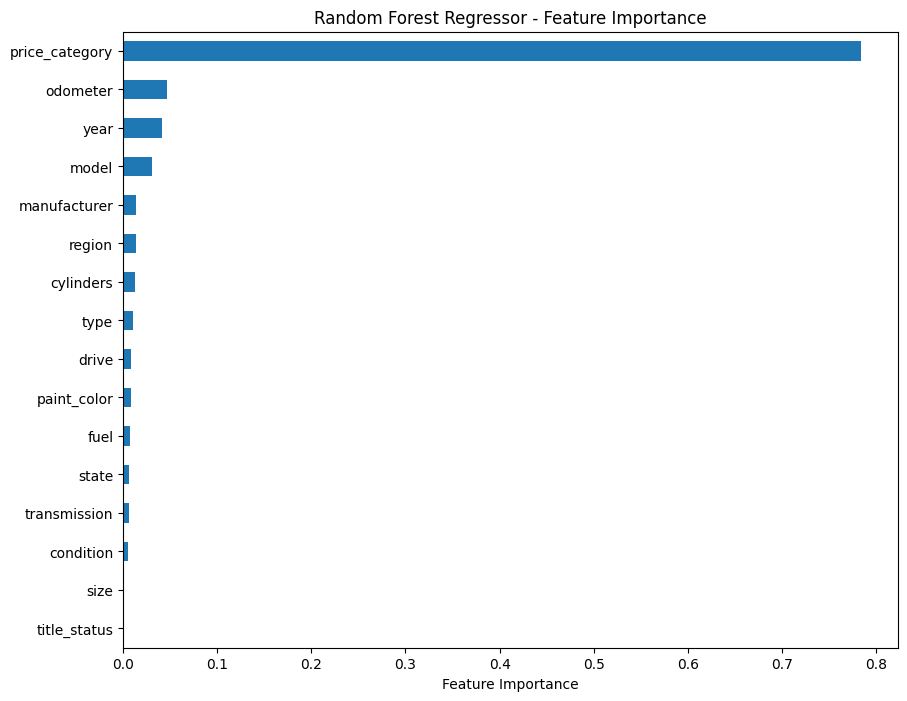

In [73]:
#Model Run 4

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X= df_working_le.drop('price', axis=1)
y= df_working_le['price']

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
print("\nFeature Importance:")
print(feature_importance)

# Plot feature importances
plt.figure(figsize=(10, 8))
feature_importance.sort_values().plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Random Forest Regressor - Feature Importance')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.2434
Test set accuracy with best model: 0.2444
Mean Squared Error (MSE): 45939390.4828
R² score: 0.8004


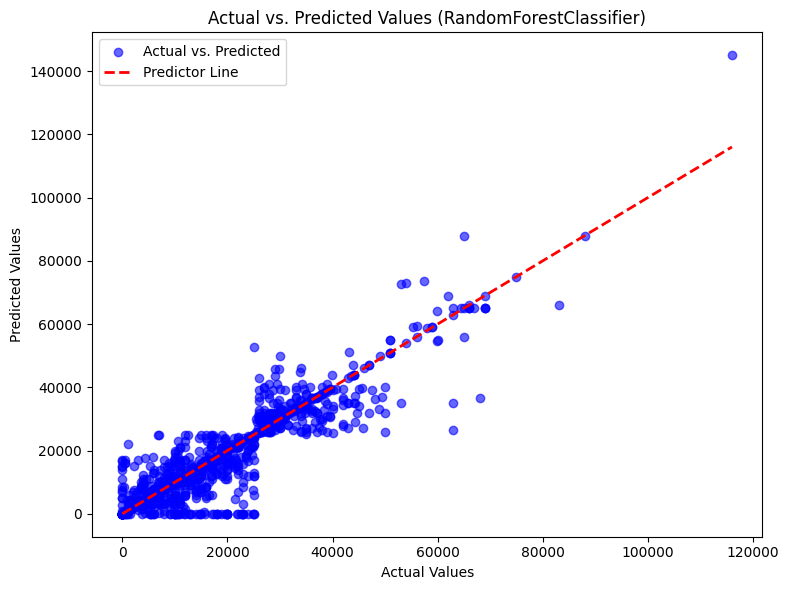

In [74]:
# Model Run 5

#Splitting the data into input and output data
X= df_working_le.drop('price', axis=1)
y= df_working_le['price']


#Using gridsearch to tune the hyperparameters of the ML model to improve the performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate on the test set with the best model
est_rf = grid_search.best_estimator_
y_pred = est_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with best model: {accuracy:.4f}")

# Calculate MSE and R² scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² score: {r2:.4f}")


# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs. Predicted')

# Plot the predictor line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Predictor Line')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (RandomForestClassifier)')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 233}
Best cross-validation MSE: 30852538.4438
Test set Mean Squared Error (MSE): 22152791.2064
Test set R² score: 0.9038


<ipython-input-75-4e3e8285f3ed>:48: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


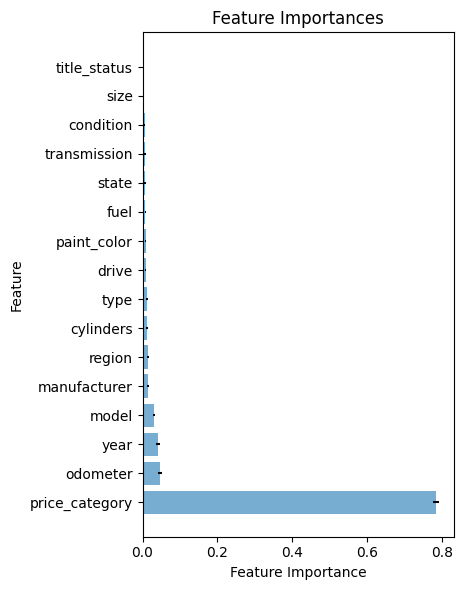

In [75]:
# Model Run 6

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Define a parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation MSE: {abs(random_search.best_score_):.4f}")

# Evaluate on the test set with the best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculate MSE and R² scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test set Mean Squared Error (MSE): {mse:.4f}")
print(f"Test set R² score: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs. Predicted')

# Plot the predictor line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Predictor Line')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (RandomForestRegressor)')
plt.legend()

plt.subplot(1, 2, 2)
importances = best_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns  # Assuming X_train is a DataFrame with feature names

plt.barh(range(X_train.shape[1]), importances[indices], xerr=std[indices], align='center', alpha=0.6)
plt.yticks(range(X_train.shape[1]), feature_names[indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')

# Show plot
plt.tight_layout()
plt.show()

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 233}
Best cross-validation MSE: 30852538.4438
Test set Mean Squared Error (MSE): 22152791.2064
Test set R² score: 0.9038
Feature importances:
price_category: 0.7842
odometer: 0.0468
year: 0.0415
model: 0.0308
manufacturer: 0.0141
region: 0.0137
cylinders: 0.0122
type: 0.0112
drive: 0.0086
paint_color: 0.0085
fuel: 0.0078
state: 0.0063
transmission: 0.0060
condition: 0.0056
size: 0.0016
title_status: 0.0010


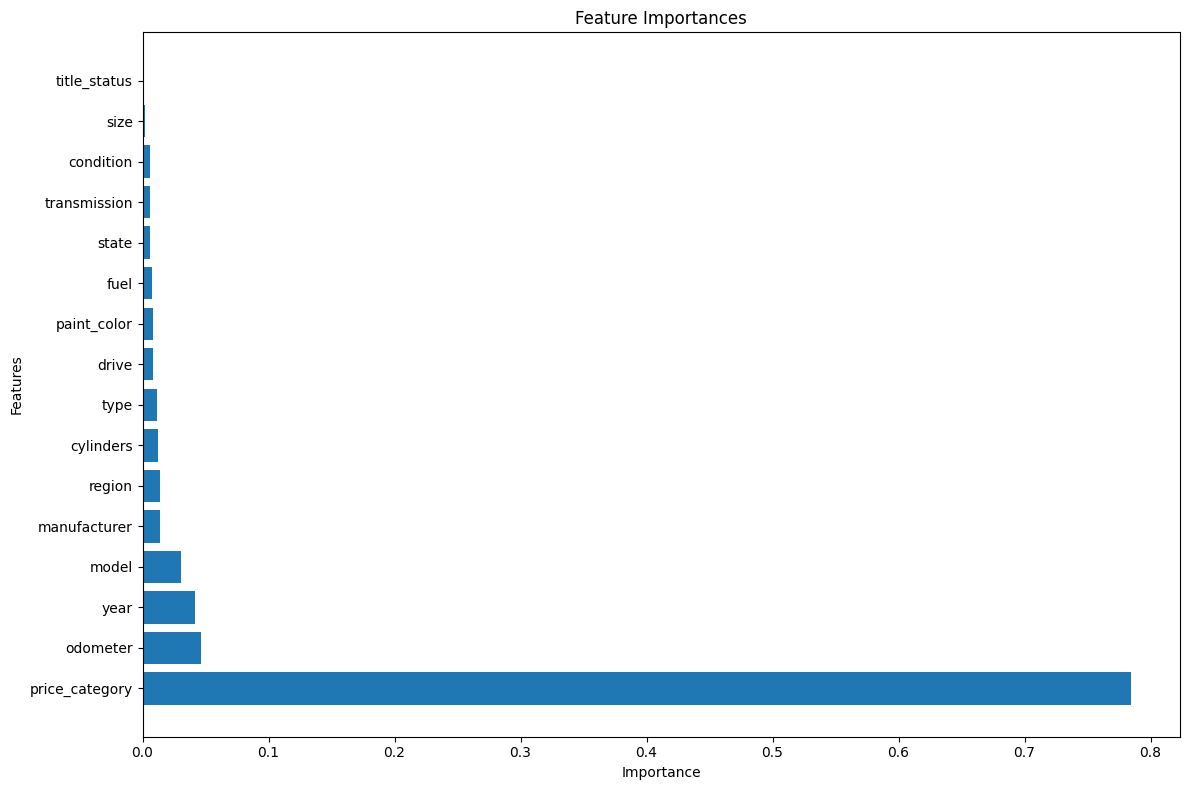

In [76]:
#Model Run 7

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Define a parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation MSE: {abs(random_search.best_score_):.4f}")

# Evaluate on the test set with the best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculate MSE and R² scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test set Mean Squared Error (MSE): {mse:.4f}")
print(f"Test set R² score: {r2:.4f}")

# Feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature importances
print("Feature importances:")
for f in range(X_train.shape[1]):
    print(f"{X.columns[indices[f]]}: {importances[indices[f]]:.4f}")

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [77]:
# Model Run 8 Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

#Splitting the data into input and output data
X= df_working_le.drop('price', axis=1)
y= df_working_le['price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale features
    ('regressor', LinearRegression())  # Step 2: Linear Regression model
])

# Define a parameter grid for GridSearchCV (adjust according to LinearRegression's valid parameters)
param_grid = {
    'regressor__fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'regressor__positive': [True, False]  # Whether to enforce positive coefficients
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation MSE: {abs(grid_search.best_score_):.4f}")

# Evaluate on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate MSE and R² scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test set Mean Squared Error (MSE): {mse:.4f}")
print(f"Test set R² score: {r2:.4f}")


Best parameters: {'regressor__fit_intercept': True, 'regressor__positive': False}
Best cross-validation MSE: 71014858.2577
Test set Mean Squared Error (MSE): 70050610.7626
Test set R² score: 0.6957


In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5091 entries, 6111 to 13842
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          5091 non-null   int64  
 1   year            5091 non-null   float64
 2   manufacturer    5091 non-null   int64  
 3   model           5091 non-null   int64  
 4   condition       5091 non-null   int64  
 5   cylinders       5091 non-null   int64  
 6   fuel            5091 non-null   int64  
 7   odometer        5091 non-null   float64
 8   title_status    5091 non-null   int64  
 9   transmission    5091 non-null   int64  
 10  drive           5091 non-null   int64  
 11  size            5091 non-null   int64  
 12  type            5091 non-null   int64  
 13  paint_color     5091 non-null   int64  
 14  state           5091 non-null   int64  
 15  price_category  5091 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 676.1 KB
